Importing the Dependancies

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection and Analysis

In [125]:
insurance_cost = pd.read_csv("C://Users//Administrator//Downloads//insurance.csv")

In [126]:
insurance_cost.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [127]:
# number of rows and coulmns
insurance_cost.shape

(1338, 7)

In [128]:
# dataset information
insurance_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [129]:
# Checkinf ro missing values
insurance_cost.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [131]:
# statistical measures
insurance_cost.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

<Figure size 600x600 with 0 Axes>

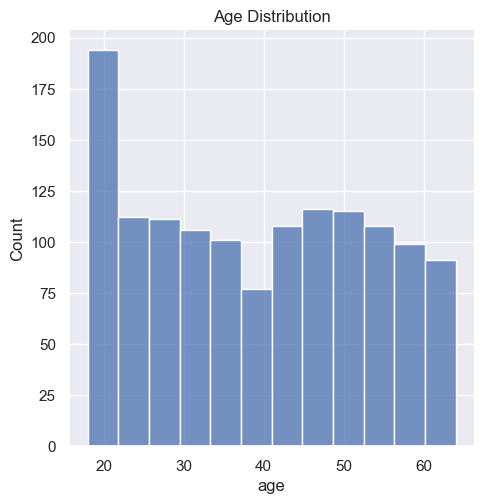

In [132]:
# distribution of age value
sns.set()
plt.figure(figsize=(6, 6))
sns.displot(insurance_cost['age'])
plt.title('Age Distribution')
plt.show()

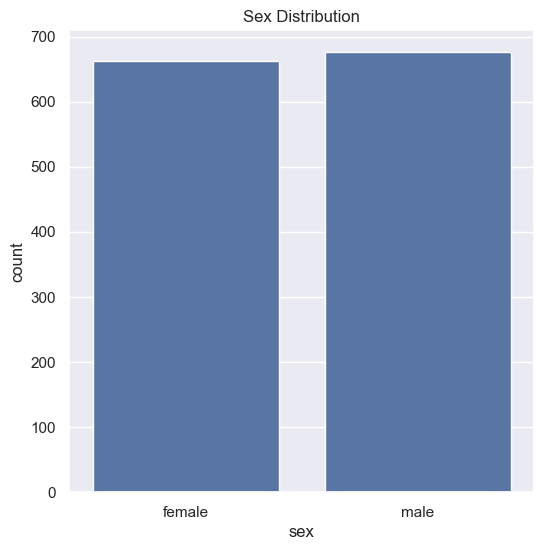

In [133]:
# distribution of gender column
plt.figure(figsize=(6, 6))
sns.countplot(x='sex', data = insurance_cost)
plt.title('Sex Distribution')
plt.show()

In [134]:
insurance_cost['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

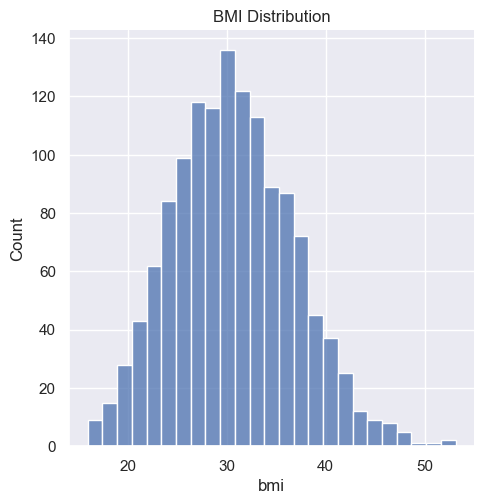

In [135]:
# distribution of bmi distribution
sns.set()
plt.figure(figsize=(6, 6))
sns.displot(insurance_cost['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

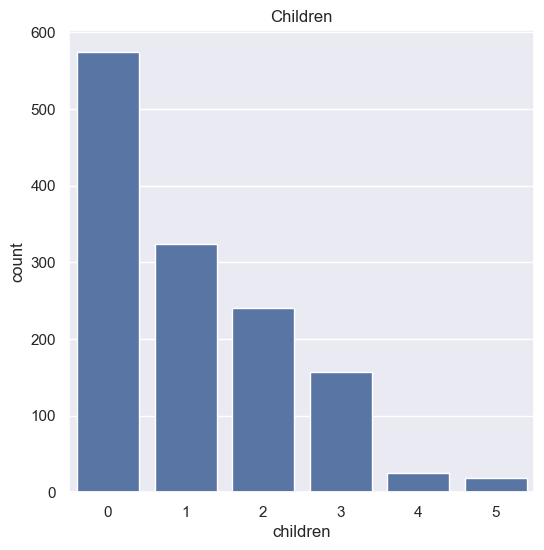

In [137]:
# distribution of children column
plt.figure(figsize=(6, 6))
sns.countplot(x='children', data=insurance_cost)
plt.title('Children')
plt.show()

In [138]:
insurance_cost['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

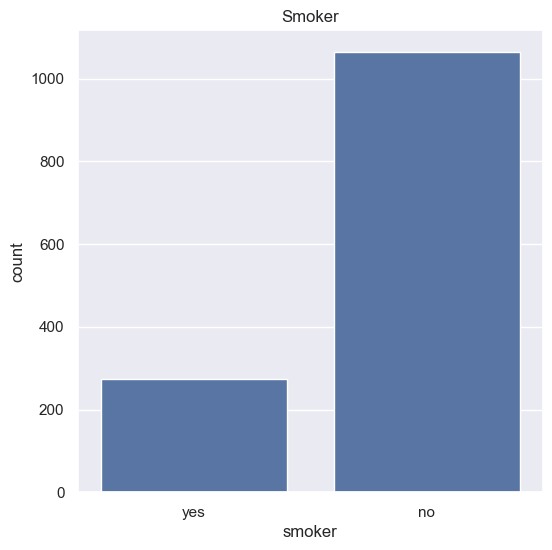

In [139]:
# distribution of smoker column
plt.figure(figsize=(6, 6))
sns.countplot(x='smoker', data=insurance_cost)
plt.title('Smoker')
plt.show()

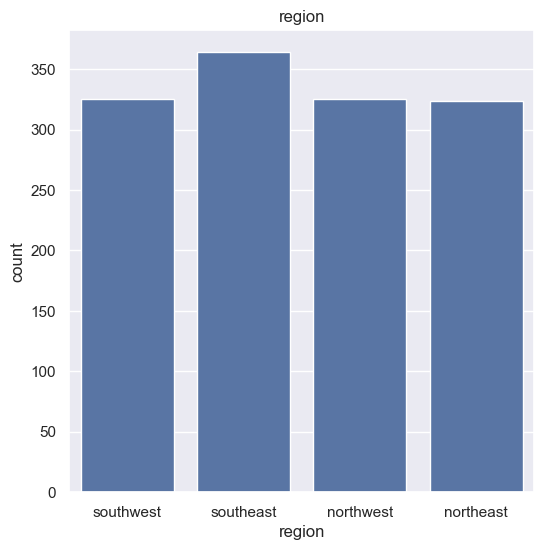

In [140]:
# region
# distribution of children column
plt.figure(figsize=(6, 6))
sns.countplot(x='region', data=insurance_cost)
plt.title('region')
plt.show()

In [141]:
insurance_cost['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

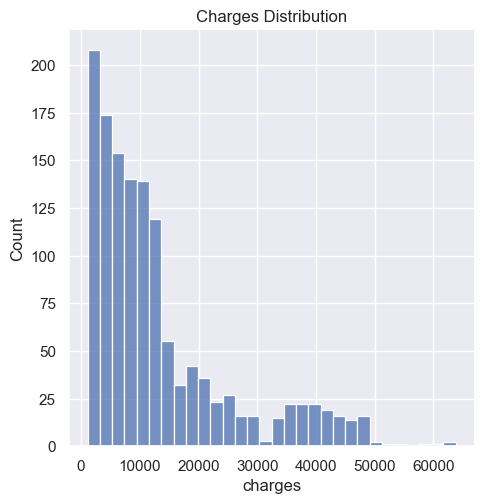

In [142]:
# distribution of bmi distribution
sns.set()
plt.figure(figsize=(6, 6))
sns.displot(insurance_cost['charges'])
plt.title('Charges Distribution')
plt.show()

Data Preprocessing

Encoding

In [145]:
#  encoding sex column
insurance_cost.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)

# encoding smoker column
insurance_cost.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)

# encoding the region column
insurance_cost.replace({'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5680\4136946979.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_cost.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5680\4136946979.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_cost.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5680\4136946979.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remov

In [146]:
insurance_cost.head()

age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       0       1  16884.92400
1   18    0  33.770         1       1       0   1725.55230
2   28    0  33.000         3       1       0   4449.46200
3   33    0  22.705         0       1       3  21984.47061
4   32    0  28.880         0       1       3   3866.85520

Splitting the Features and Target

In [148]:
X = insurance_cost.drop(['charges'], axis=1)
Y = insurance_cost['charges']

In [149]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Train Test Split

In [151]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [152]:
X.shape, X_train.shape, X_test.shape

((1338, 6), (1070, 6), (268, 6))

Model Training

Linear Regression

In [155]:
model = LinearRegression()

In [156]:
model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [158]:
# prediction on training data
training_data_prediction = model.predict(X_train)

In [159]:
# r squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [160]:
print(r2_train)

0.751505643411174


In [161]:
# prediction on training data
test_data_prediction = model.predict(X_test)

In [162]:
# r squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [163]:
print(r2_test)

0.7447273869684077


Building a Predicting System

In [199]:
input_data = (60,1,25.84,0,1,3)

# changing into numpy array
input_data_as_numpy = np.asarray(input_data)

# reshape the data
input_data_reshaped = input_data_as_numpy.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

print("The Insurance Cost is USD", prediction[0])

[11720.56103232]
The Insurance Cost is USD 11720.56103231891


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
